# Haar Random Unitary (ibmq_montreal)

In [9]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [12]:
ibmq_montreal = provider.get_backend("ibmq_montreal")

In [3]:
import sys
sys.path.append("./")

In [4]:
import random
import numpy as np
import importlib
import pickle
import time
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
from test_unitaries import *

In [6]:
seed = 42 # random seed
num_data = 20000 # original: 20000
Nq = 4 # number of qubit
Ns = 1000

In [7]:
job_ids = []

In [14]:
qc = QuantumCircuit(Nq)
qc.append(qi.random_unitary(2 ** Nq, seed = 900).to_instruction(), range(Nq))
qc.measure_all()
# qc = transpile(qc, basis_gates=["u1", "u2", "u3", "cx"], optimization_level=0)
qc = transpile(qc, backend=ibmq_montreal, optimization_level=1)
qc.draw("mpl")

ValueError: Image size of 1710x104711 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1710.73x104712 with 1 Axes>

In [15]:
qc.count_ops()

OrderedDict([('rz', 773),
             ('cx', 666),
             ('sx', 506),
             ('measure', 4),
             ('barrier', 1)])

In [8]:
for i in range(1, (num_data + 1) // 900 + 2):
    qcs = []
    for j in range(900):
        qc = QuantumCircuit(Nq)
        qc.append(qi.random_unitary(2 ** Nq, seed = (i - 1) * 900 + j).to_instruction(), range(Nq))
        qc.measure_all()
        qcs.append(qc)
    print("generated 900 circuits")
    job = execute(qcs, shots = Ns, backend = provider.get_backend("ibmq_montreal"))
    job_ids.append(job_id())
    print("job id for", i, "th job:", job.job_id())

generated 900 circuits


QiskitError: 'Keyboard interrupt in parallel_map.'

In [ ]:
with open("traning_data_haar_montreal_job_ids.pkl", "wb") as f:
    pickle.dump(job_ids, f)

In [ ]:
with open("traning_data_haar_montreal_job_ids.pkl", "rb") as f:
    job_ids = pickle.load(f)

- the result data is stored at .pkl file
- you can convert the data from Result type to counts (dict of state (str) to counts (int)) by the following function

In [ ]:
backend = provider.backend.ibmq_montreal

In [ ]:
def job_ids_to_results(job_ids, backend):
    results = []
    for job_id in job_ids:
        job = backend.retrieve_job(job.job_id())
        results.append(job.result())
    return results

In [9]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

In [10]:
counts = results_to_counts(results)

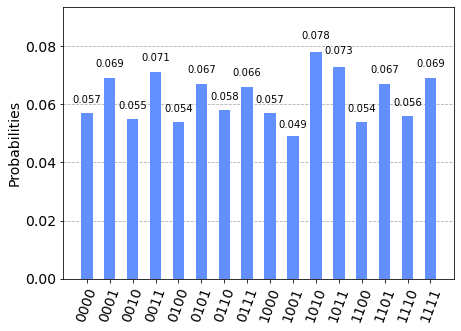

In [12]:
plot_histogram(counts[0])